In [1]:
from lda import lda
from lda.data.corpus import Corpus
from lda.data.document import Document
from lda.utils import color_by_phis
import matplotlib.pyplot as plt

In [2]:
corpus = Corpus(documents=[
    Document.from_text('Have a jolly christmas at university!'),
    Document.from_text('Merry christmas, Jens Lagergen!'),
    Document.from_text('Christmas is a very merry time.'),
    Document.from_text('Jens Lagergen is the best professor at university.'),
    Document.from_text('Universities are important learning centers. Especially because of Jens Lagergen.'),
    Document.from_text('What even is a university? Experts disagree.')
])
corpus

Corpus with 6 documents

In [3]:
corpus.documents[0].included_words

[Word(original_form='jolly', lda_form='jolly', include=True),
 Word(original_form='christmas', lda_form='christmas', include=True),
 Word(original_form='university', lda_form='university', include=True)]

In [4]:
corpus.documents[1].included_words

[Word(original_form='Merry', lda_form='merry', include=True),
 Word(original_form='christmas', lda_form='christmas', include=True),
 Word(original_form='Jens', lda_form='jens', include=True),
 Word(original_form='Lagergen', lda_form='lagergen', include=True)]

In [5]:
corpus.documents[2].included_words

[Word(original_form='Christmas', lda_form='christmas', include=True),
 Word(original_form='merry', lda_form='merry', include=True),
 Word(original_form='time', lda_form='time', include=True)]

In [6]:
corpus.documents[3].included_words

[Word(original_form='Jens', lda_form='jens', include=True),
 Word(original_form='Lagergen', lda_form='lagergen', include=True),
 Word(original_form='best', lda_form='good', include=True),
 Word(original_form='professor', lda_form='professor', include=True),
 Word(original_form='university', lda_form='university', include=True)]

In [7]:
corpus.documents[2].included_words[-1] == corpus.documents[3].included_words[0]

False

In [8]:
corpus.word_count

Counter({Word(original_form='jolly', lda_form='jolly', include=True): 1,
         Word(original_form='christmas', lda_form='christmas', include=True): 3,
         Word(original_form='university', lda_form='university', include=True): 4,
         Word(original_form='Merry', lda_form='merry', include=True): 2,
         Word(original_form='Jens', lda_form='jens', include=True): 3,
         Word(original_form='Lagergen', lda_form='lagergen', include=True): 3,
         Word(original_form='time', lda_form='time', include=True): 1,
         Word(original_form='best', lda_form='good', include=True): 1,
         Word(original_form='professor', lda_form='professor', include=True): 1,
         Word(original_form='important', lda_form='important', include=True): 1,
         Word(original_form='learning', lda_form='learning', include=True): 1,
         Word(original_form='centers', lda_form='center', include=True): 1,
         Word(original_form='Especially', lda_form='especially', include=True): 1

In [9]:
params, lower_bound_evol = lda(corpus, num_topics=2, num_iterations=64)

  0%|          | 0/64 [00:00<?, ?it/s]

In [10]:
params

{'alpha': array([0.13460757, 0.1017766 ]),
 'beta': [{Word(original_form='christmas', lda_form='christmas', include=True): 0.27272300524086013,
   Word(original_form='Merry', lda_form='merry', include=True): 0.18181533682724008,
   Word(original_form='jolly', lda_form='jolly', include=True): 0.09090766841362004,
   Word(original_form='disagree', lda_form='disagree', include=True): 0.09090766841362004,
   Word(original_form='time', lda_form='time', include=True): 0.09090766841362004,
   Word(original_form='university', lda_form='university', include=True): 0.18183098427741962,
   Word(original_form='Experts', lda_form='expert', include=True): 0.09090766841362004,
   Word(original_form='best', lda_form='good', include=True): 3.677066852255389e-136,
   Word(original_form='Especially', lda_form='especially', include=True): 5.457491027853747e-147,
   Word(original_form='centers', lda_form='center', include=True): 1.5537228214242098e-146,
   Word(original_form='important', lda_form='importan

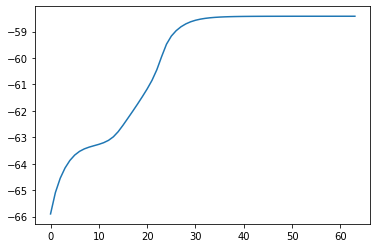

In [11]:
plt.figure()
plt.plot(lower_bound_evol)

In [12]:
lower_bound_evol

array([-65.90071372, -65.09464364, -64.55137975, -64.1623435 ,
       -63.877515  , -63.67345161, -63.53278902, -63.43780237,
       -63.37130566, -63.31843729, -63.26667804, -63.20395386,
       -63.11556524, -62.98222206, -62.78798457, -62.54299975,
       -62.28034594, -62.01548418, -61.74378916, -61.46252517,
       -61.16912569, -60.84446108, -60.44328538, -59.94235667,
       -59.47558862, -59.16871957, -58.96444316, -58.81613034,
       -58.70702403, -58.62735389, -58.56961876, -58.52795699,
       -58.49792316, -58.47624196, -58.46054933, -58.44915298,
       -58.44084715, -58.43477257, -58.43031464, -58.42703299,
       -58.42461045, -58.42281762, -58.42148784, -58.42049956,
       -58.41976401, -58.41921551, -58.41880596, -58.4184998 ,
       -58.4182707 , -58.41809911, -58.41797049, -58.41787401,
       -58.41780161, -58.41774724, -58.4177064 , -58.4176757 ,
       -58.41765263, -58.41763527, -58.41762222, -58.4176124 ,
       -58.417605  , -58.41759944, -58.41759525, -58.41

In [13]:
colored = color_by_phis(corpus, params['phis'])
for text in colored.values():
    print(text)

Have a jolly christmas at university !
Merry christmas , Jens Lagergen !
Christmas is a very merry time .
Jens Lagergen is the best professor at university .
Universities are important learning centers . Especially because of Jens Lagergen .
What even is a university ? Experts disagree .
